In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# visualize images
def show_images(images, titles=None):
    plt.figure(figsize=(12, 6))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.imshow(image)
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [4]:
# Mixup
def mixup(image1, image2, alpha=0.2):
    lam = np.random.beta(alpha, alpha)

    mixed_image = lam * image1 + (1 - lam) * image2
    mixed_image = mixed_image.astype(np.uint8)

    return mixed_image

In [5]:
# Cutout
def cutout(image, mask_size):
    height, width, _ = image.shape

    mask_center = (np.random.randint(width), np.random.randint(height))

    x1 = np.clip(mask_center[0] - mask_size // 2, 0, width)
    y1 = np.clip(mask_center[1] - mask_size // 2, 0, height)
    x2 = np.clip(mask_center[0] + mask_size // 2, 0, width)
    y2 = np.clip(mask_center[1] + mask_size // 2, 0, height)

    image_cutout = image.copy()
    image_cutout[y1:y2, x1:x2, :] = 0

    return image_cutout

In [6]:
# CutMix
def cutmix(image1, image2):
    height, width, _ = image1.shape

    cut_rat = np.random.rand()
    cut_w = int(width * cut_rat)
    cut_h = int(height * cut_rat)

    cut_x = np.random.randint(width)
    cut_y = np.random.randint(height)

    x1 = np.clip(cut_x - cut_w // 2, 0, width)
    y1 = np.clip(cut_y - cut_h // 2, 0, height)
    x2 = np.clip(cut_x + cut_w // 2, 0, width)
    y2 = np.clip(cut_y + cut_h // 2, 0, height)

    mixed_image = image1.copy()
    mixed_image[y1:y2, x1:x2, :] = image2[y1:y2, x1:x2, :]

    return mixed_image

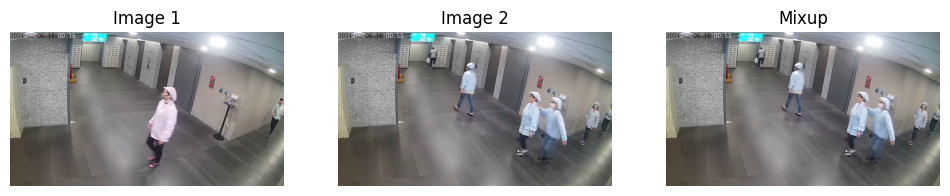

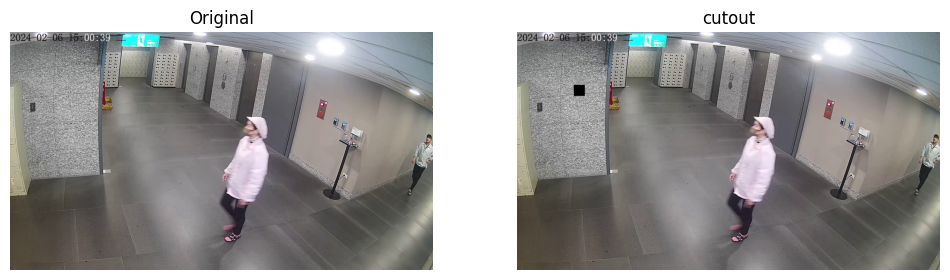

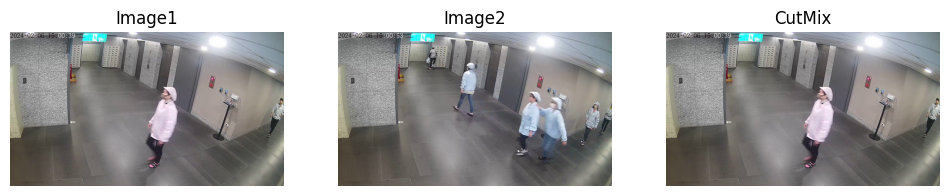

In [10]:
# example usage and visualization
image1 = cv2.imread('image1.png')
image2 = cv2.imread('image2.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

mixed_image = mixup(image1, image2, alpha=0.5)
cutout_image = cutout(image1, mask_size=50)
cutmix_image = cutmix(image1, image2)

# Visualize the result
show_images([image1, image2, mixed_image], titles=['Image 1', 'Image 2', 'Mixup'])
show_images([image1, cutout_image], titles=['Original', 'cutout'])
show_images([image1, image2, cutmix_image], titles=['Image1', 'Image2', 'CutMix'])